In [82]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce
import itertools as it
import seaborn as sns
from collections import Counter
import numpy
from matplotlib.pyplot import figure

In [83]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('pastel')


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [84]:
max_strat = 6
min_strat = -5
max_score = 5
min_score = -5

pairs = 125
generations = 160
print(generations)
population = 100
selection_bias = 100

cost = 0.1
benefit = 1

mutation = 0.000
# TODO -> Mais pequeno

simulations = 1



160


In [85]:
class Agent:
    def __init__(self, strategy, score, payoff, selection_bias):
        self.payoff = payoff
        self.strategy = strategy
        self.score = score
        self.selection_bias = selection_bias
        self.interactions = 0
    
    def make_child(self, parent):
        self.payoff = 0
        self.strategy = parent.strategy
        self.score = 0
        self.selection_bias = selection_bias
        self.interactions = 0
        
    def add_score(self, new_score):
        temp_score = new_score + self.score
        if temp_score >= min_score and temp_score <= max_score:
             self.score = temp_score
        elif temp_score <= min_score:
            self.score = min_score
        elif temp_score >= max_score:
            self.score = max_score

In [86]:
def selectOne(population):
    max_value     = sum([c.payoff for c in population])
    pick    = random.uniform(0, max_value)
    current = 0
    for agent in population:
        current += agent.payoff
        if current >= pick:
                return agent
            
def selectOnePair(population):
    i=0
    agents = []
    while i < 2:
        max_value = sum([c.selection_bias for c in population])
        pick    = random.uniform(0, max_value)
        current = 0
        for agent in population:
            current += agent.selection_bias
            if current > pick:
                agents.append(agent)
        i += 1     
    return agents                   

In [87]:
def ProbabilityList(population_d):
    fitness = [c.payoff for c in population_d ]
    total_fit = sum(fitness)
    relative_fitness = [f/total_fit for f in fitness]
    return relative_fitness

def FitnessChoices(population, relative_fitness, number):
    return random.choices(population, weights = relative_fitness, k = number)

1
simulation:  0


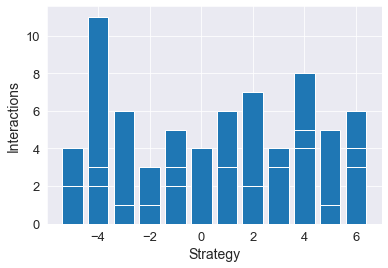

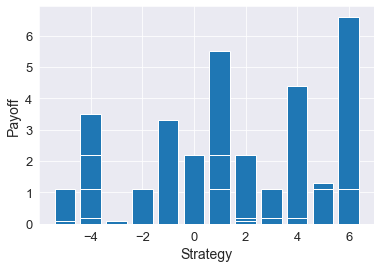

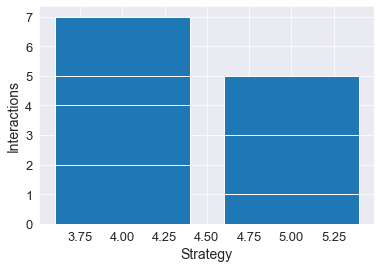

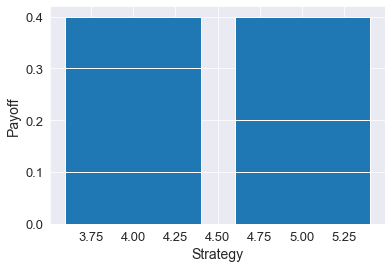

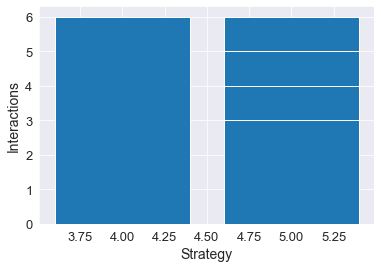

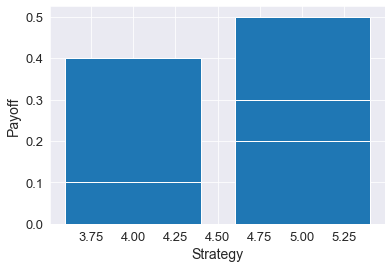

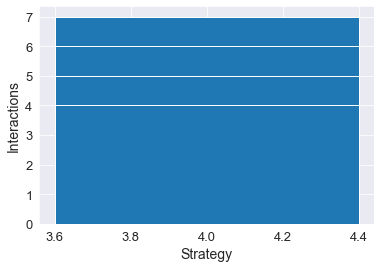

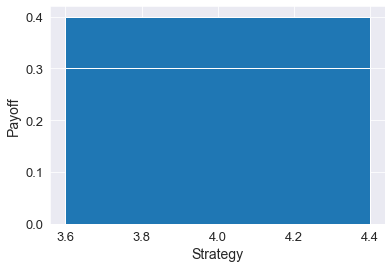

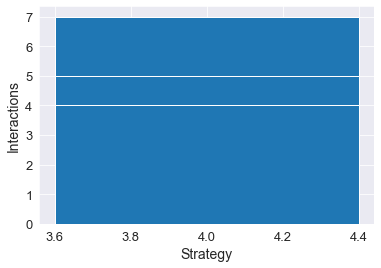

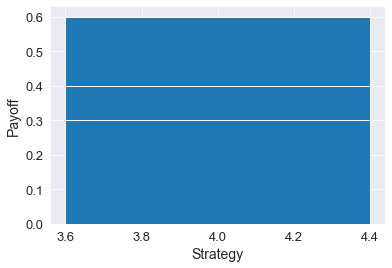

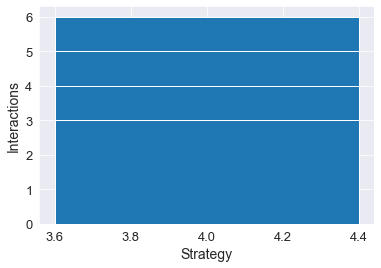

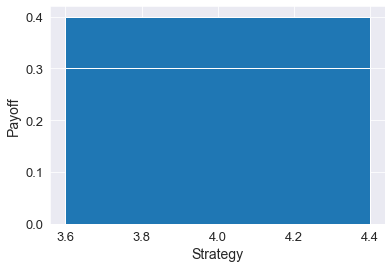

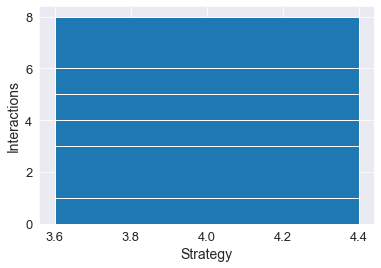

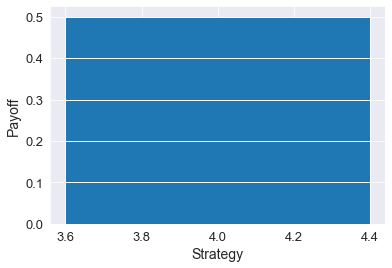

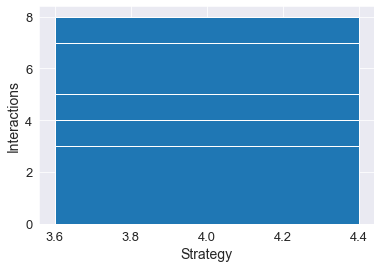

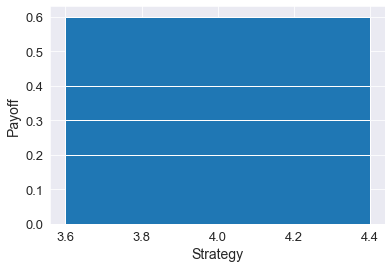

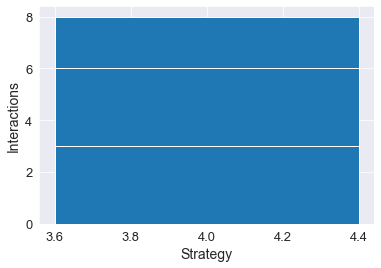

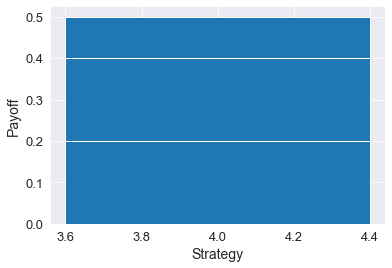

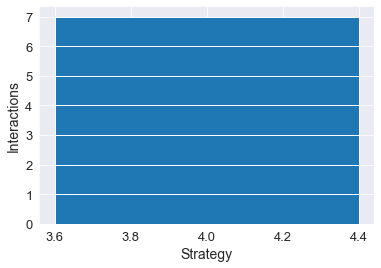

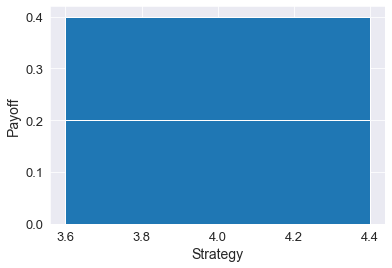

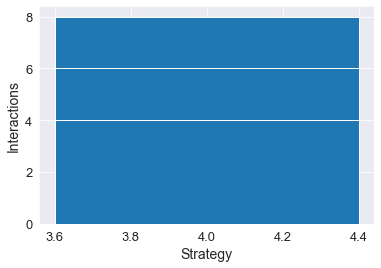

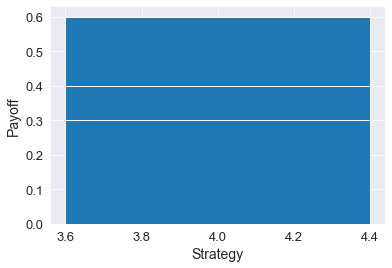

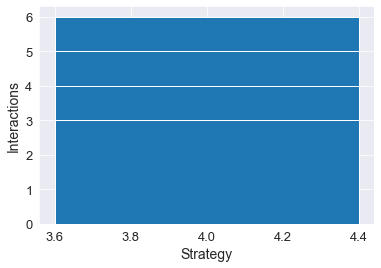

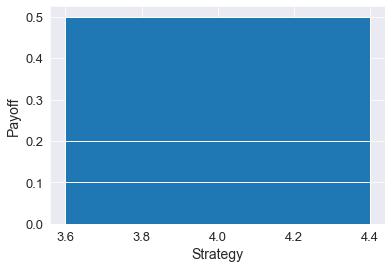

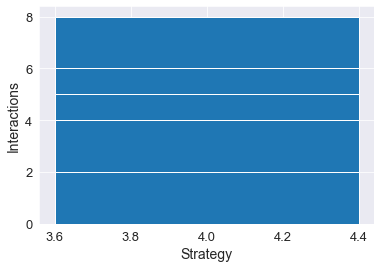

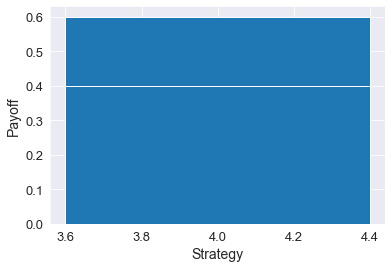

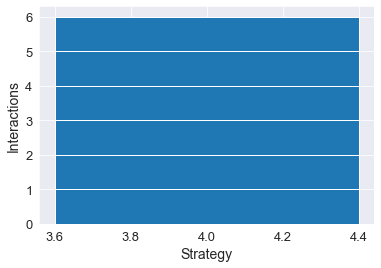

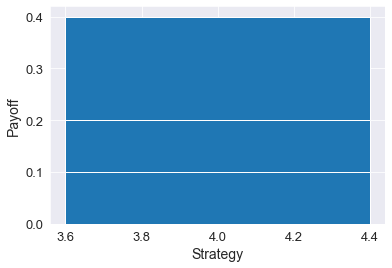

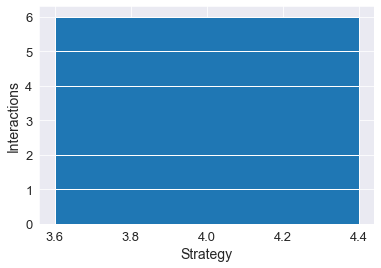

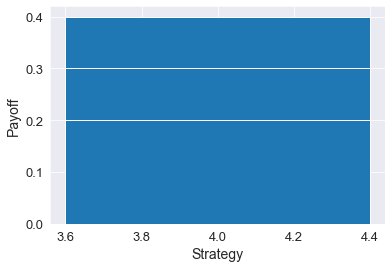

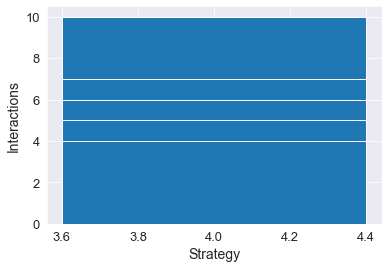

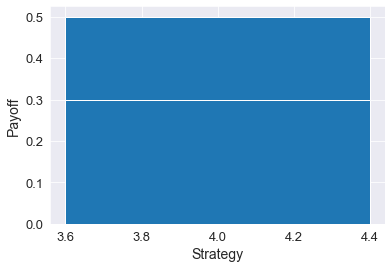

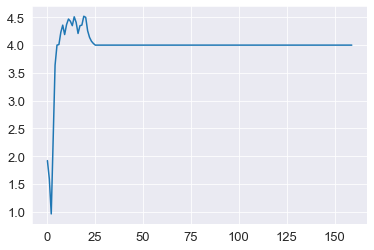

Done! :D


In [88]:
mean_strategy_per_generation = []
mean_payoff_per_generation = []
global_strategies = []

print(simulations)
for simulation in range(simulations) :

    if simulation % 1000 == 0:
        print("simulation: ", simulation)
    agents = []
    for i in range(population):
        agents.append(Agent(random.randint(min_strat, max_strat), 0,0, random.randint(0,selection_bias)))
    

    for generation in range(generations) :
      #  if(generation % 1000 == 0):
            #   print(generation)
        for pair in range(pairs) :
            agent_pair = selectOnePair(agents)
            #print(len(agent_pair))
            donor = agent_pair[0]
            recipient = agent_pair[1]
            
            donor.interactions += 1
            recipient.interactions += 1
            
            if recipient.score >= donor.strategy:
                
                recipient.payoff += benefit
                donor.add_score(benefit)
            else:
                donor.add_score(-benefit)

            recipient.payoff += cost
            
      #  for agent in agents:
          #  print(agent.interactions)
    
        payoffs = []
        for agent in agents:
            payoffs.append(agent.payoff)

        if(generation % 10 == 0):
            
            points=[]
            interactions=[]
            payoffs = []
            
            for agent in agents:
                payoffs.append(agent.payoff)
                points.append(agent.strategy)
                interactions.append(agent.interactions)
                
            plt.bar(points,interactions,align='center') # A bar chart
            plt.xlabel('Strategy')
            plt.ylabel('Interactions')
            plt.show()
            
            plt.bar(points,payoffs,align='center') # A bar chart
            plt.xlabel('Strategy')
            plt.ylabel('Payoff')
            plt.show()
        
        agents.sort(key=lambda x: x.payoff, reverse=True)
        for agent in range(len(agents)):       
            parent = selectOne(agents)
            agents[agent].make_child(parent)

        
        estrategias = []
        total = 0
        for agent in agents:
            estrategias.append(agent.strategy)
            global_strategies.append(agent.strategy)
            

            estrategias_numpy = numpy.array(estrategias)
        payoffs_numpy = numpy.array(payoffs)

        
        mean_strategy_per_generation.append(estrategias_numpy.mean())
        mean_payoff_per_generation.append(payoffs_numpy.mean())
        
            
global_strategies_numpy = numpy.array(global_strategies)
plt.plot(mean_strategy_per_generation)
plt.show()
print("Done! :D")

In [89]:
sum(mean_strategy_per_generation)/len(mean_strategy_per_generation)


3.976375

In [90]:
def get_graph_with_color_and_size(width, height, dpi, data, background_color, palette_color, y_lim):
    figure(figsize=(width, height), dpi=dpi)
    ax = plt.gca()
    ax.set_facecolor(background_color)
    if y_lim > 0:
        ax.set_ylim([0, y_lim])

    plt.xlabel('Time (thousands of generations)',fontname='Helvetica')
    plt.ylabel('Strategy, k',fontname='Helvetica')
    plt.title('Average k for every generation',fontname='Helvetica')
    plt.plot(data, color=sns.color_palette('Set2')[palette_color])
    plt.show()

Counter({4: 15204, 5: 600, -2: 98, -5: 24, 2: 22, 3: 18, 0: 12, 6: 10, -4: 8, 1: 2, -3: 2})


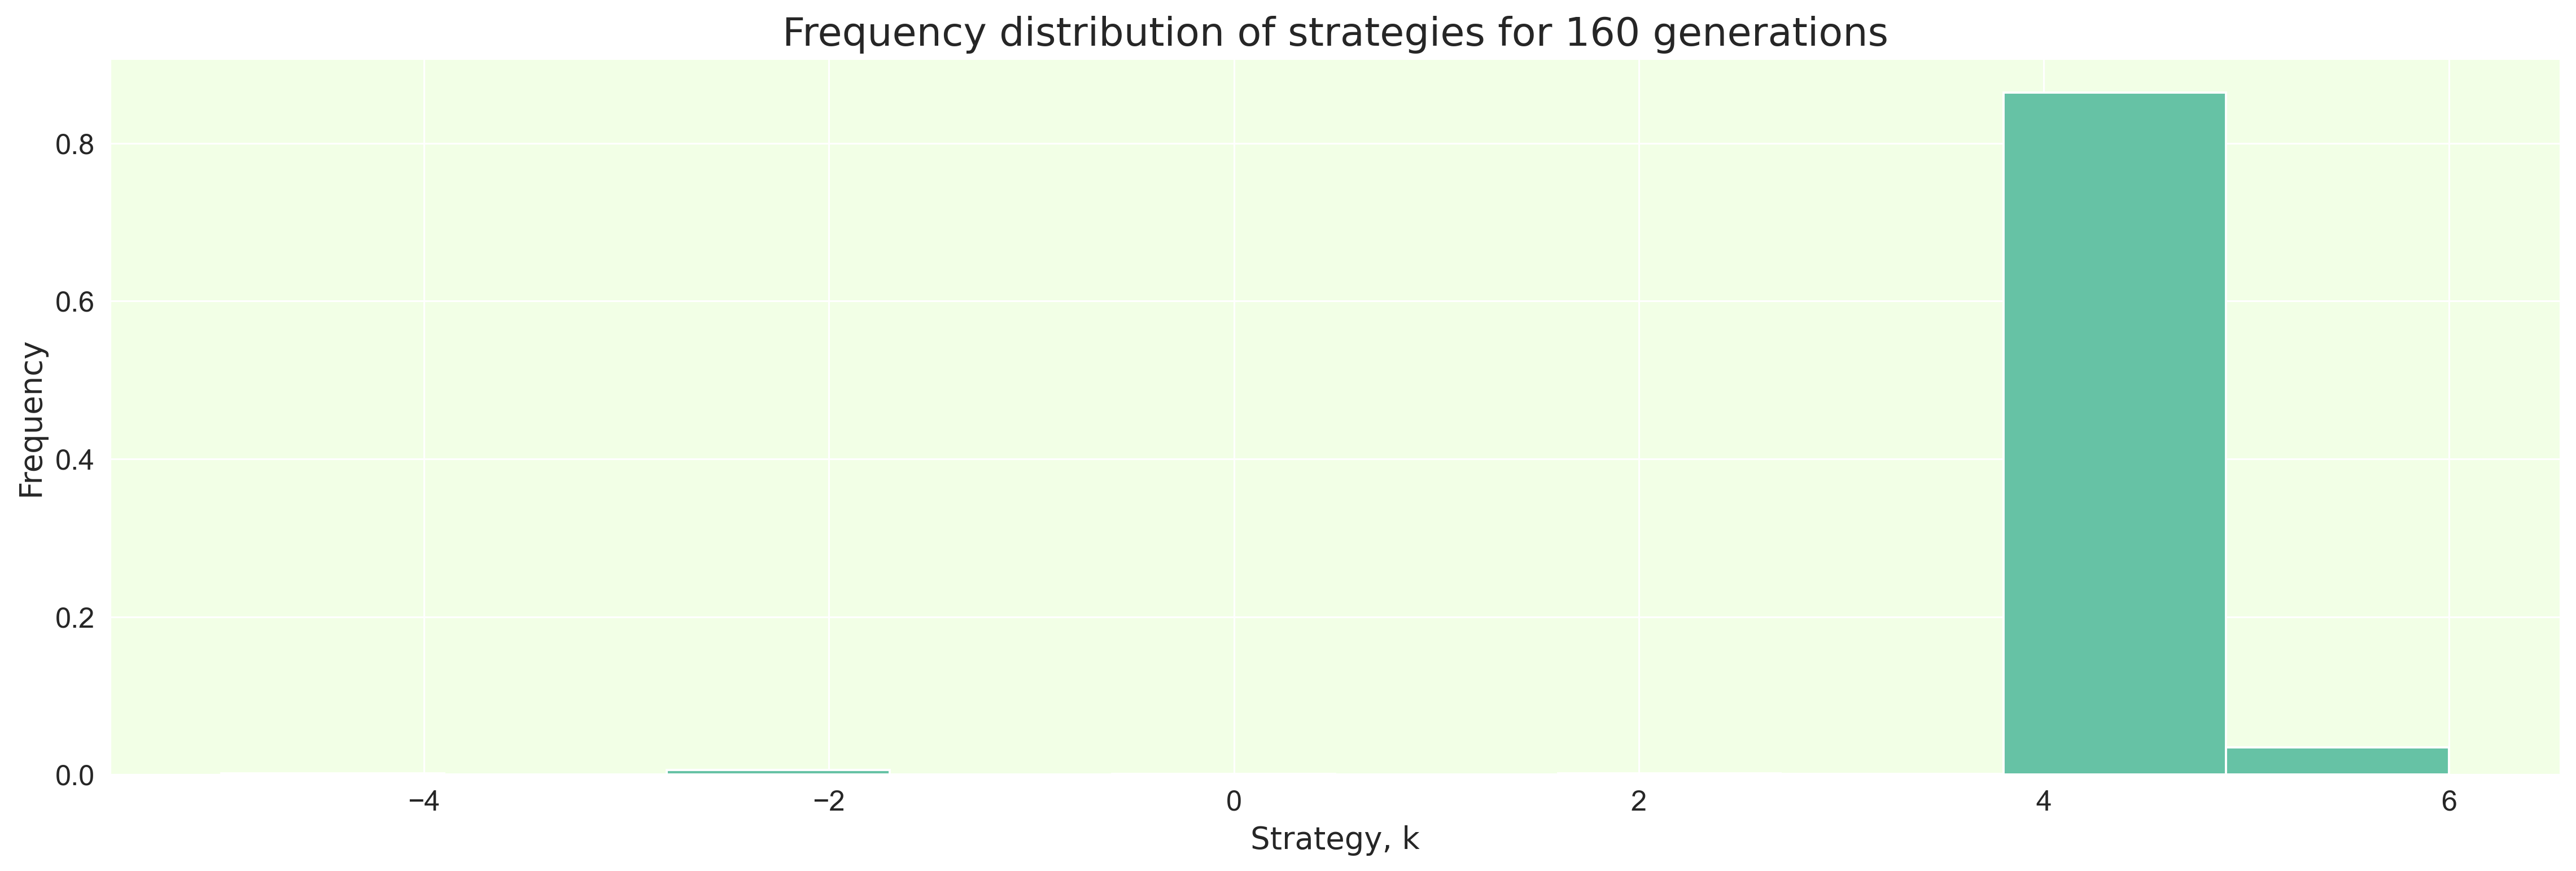

In [91]:
figure(figsize=(20, 6), dpi=280)

plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('Frequency distribution of strategies for {} generations'.format(generations),fontname='Helvetica')
x = range(0,generations)
print(Counter(global_strategies_numpy))
plt.hist( global_strategies_numpy, color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()